# HOUSING ASSIGNMENT

#PROBLEM STATEMENT#

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

In [9]:
#importing libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [10]:
#IMPORTING THE REQUIRED DATAFRAME

housing = pd.read_csv('train.csv')

In [11]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
housing.shape

(1460, 81)

In [13]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [18]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [ ]:
housing.size

In [15]:
housing.dtypes


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [16]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
# There are 1460 rows and 81 columns and all are non nulls.

In [ ]:
#reading data dictionary

In [17]:
Housing_dict = open('data_dict.txt')

print(Housing_dict.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

# DATA CLENSING

In [19]:
#Checking for missing values and their treatment

In [20]:
miss = round(housing.isna().sum()*100 / housing.shape[0], 2)
miss[miss>0].sort_values(ascending=False)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
MasVnrType      59.73
FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
Electrical       0.07
dtype: float64

In [ ]:
#all columns above have some missing values, top sex have highest missing values.
#Columns to be checked for how these missing values to be treated.

In [22]:
miss_cols = miss[miss>0].sort_values(ascending=False).index

In [23]:
miss_cols

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu',
       'LotFrontage', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure',
       'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrArea', 'Electrical'],
      dtype='object')

In [ ]:
#from data dictionary we know that NaN stands for not present for following features:
#'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'
#Imputing 'NP' for NaNs in these columns

In [33]:
NP_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'MasVnrType', 'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']
housing[NP_cols]= housing[NP_cols].fillna('NP')

In [34]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NP,Reg,Lvl,AllPub,...,0,NP,NP,NP,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NP,Reg,Lvl,AllPub,...,0,NP,NP,NP,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NP,IR1,Lvl,AllPub,...,0,NP,NP,NP,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NP,IR1,Lvl,AllPub,...,0,NP,NP,NP,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NP,IR1,Lvl,AllPub,...,0,NP,NP,NP,0,12,2008,WD,Normal,250000


In [35]:
miss = round(housing.isna().sum()*100 / housing.shape[0], 2)
miss[miss>0].sort_values(ascending=False)


LotFrontage    17.74
GarageYrBlt     5.55
MasVnrArea      0.55
Electrical      0.07
dtype: float64

In [36]:
#if Garage is not there, there will ne no GarageYrBlt

In [37]:
housing[housing.GarageYrBlt.isna()]['GarageType'].value_counts(normalize= True)

GarageType
NP    1.0
Name: proportion, dtype: float64

In [39]:
housing['GarageYrBlt']= housing['GarageYrBlt'].fillna(0)

In [42]:
housing['GarageYrBlt']

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64

In [ ]:
#MSSubClass is a categorical data so changing its data type

In [43]:
housing['MSSubClass']= housing['MSSubClass'].astype('object')

In [47]:
housing.dtypes

Id                 int64
MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

# EDA

VIZUALIZING NUMERIC CATEGORIES

<Axes: xlabel='SalePrice', ylabel='Density'>

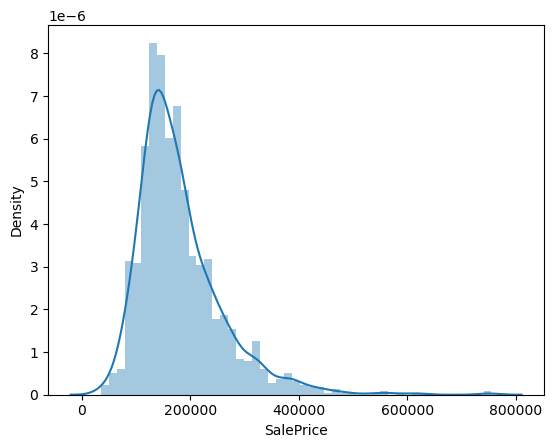

In [49]:
sns.distplot(housing['SalePrice'])

In [50]:
#Plotting numeric columns with Sale price

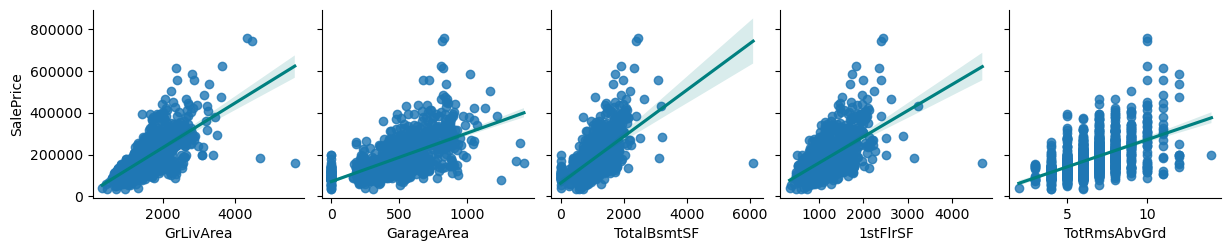

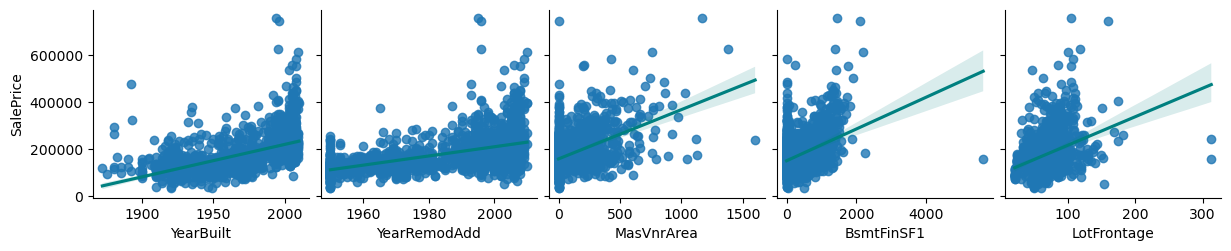

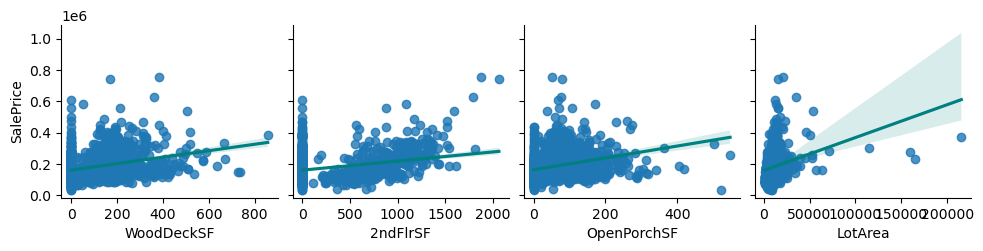

In [52]:
numeric_cols= ['GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','TotRmsAbvGrd','YearBuilt','YearRemodAdd','MasVnrArea',
'BsmtFinSF1','LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF','LotArea']

sns.pairplot(housing, x_vars=['GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','TotRmsAbvGrd'], y_vars='SalePrice', kind= 'reg', plot_kws={'line_kws':{'color':'teal'}})
sns.pairplot(housing, x_vars=['YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','LotFrontage'], y_vars='SalePrice', kind= 'reg', plot_kws={'line_kws':{'color':'teal'}})
sns.pairplot(housing, x_vars=['WoodDeckSF','2ndFlrSF','OpenPorchSF','LotArea'], y_vars='SalePrice', kind= 'reg', plot_kws={'line_kws':{'color':'teal'}})

In [53]:
#Visualizing Categorical features

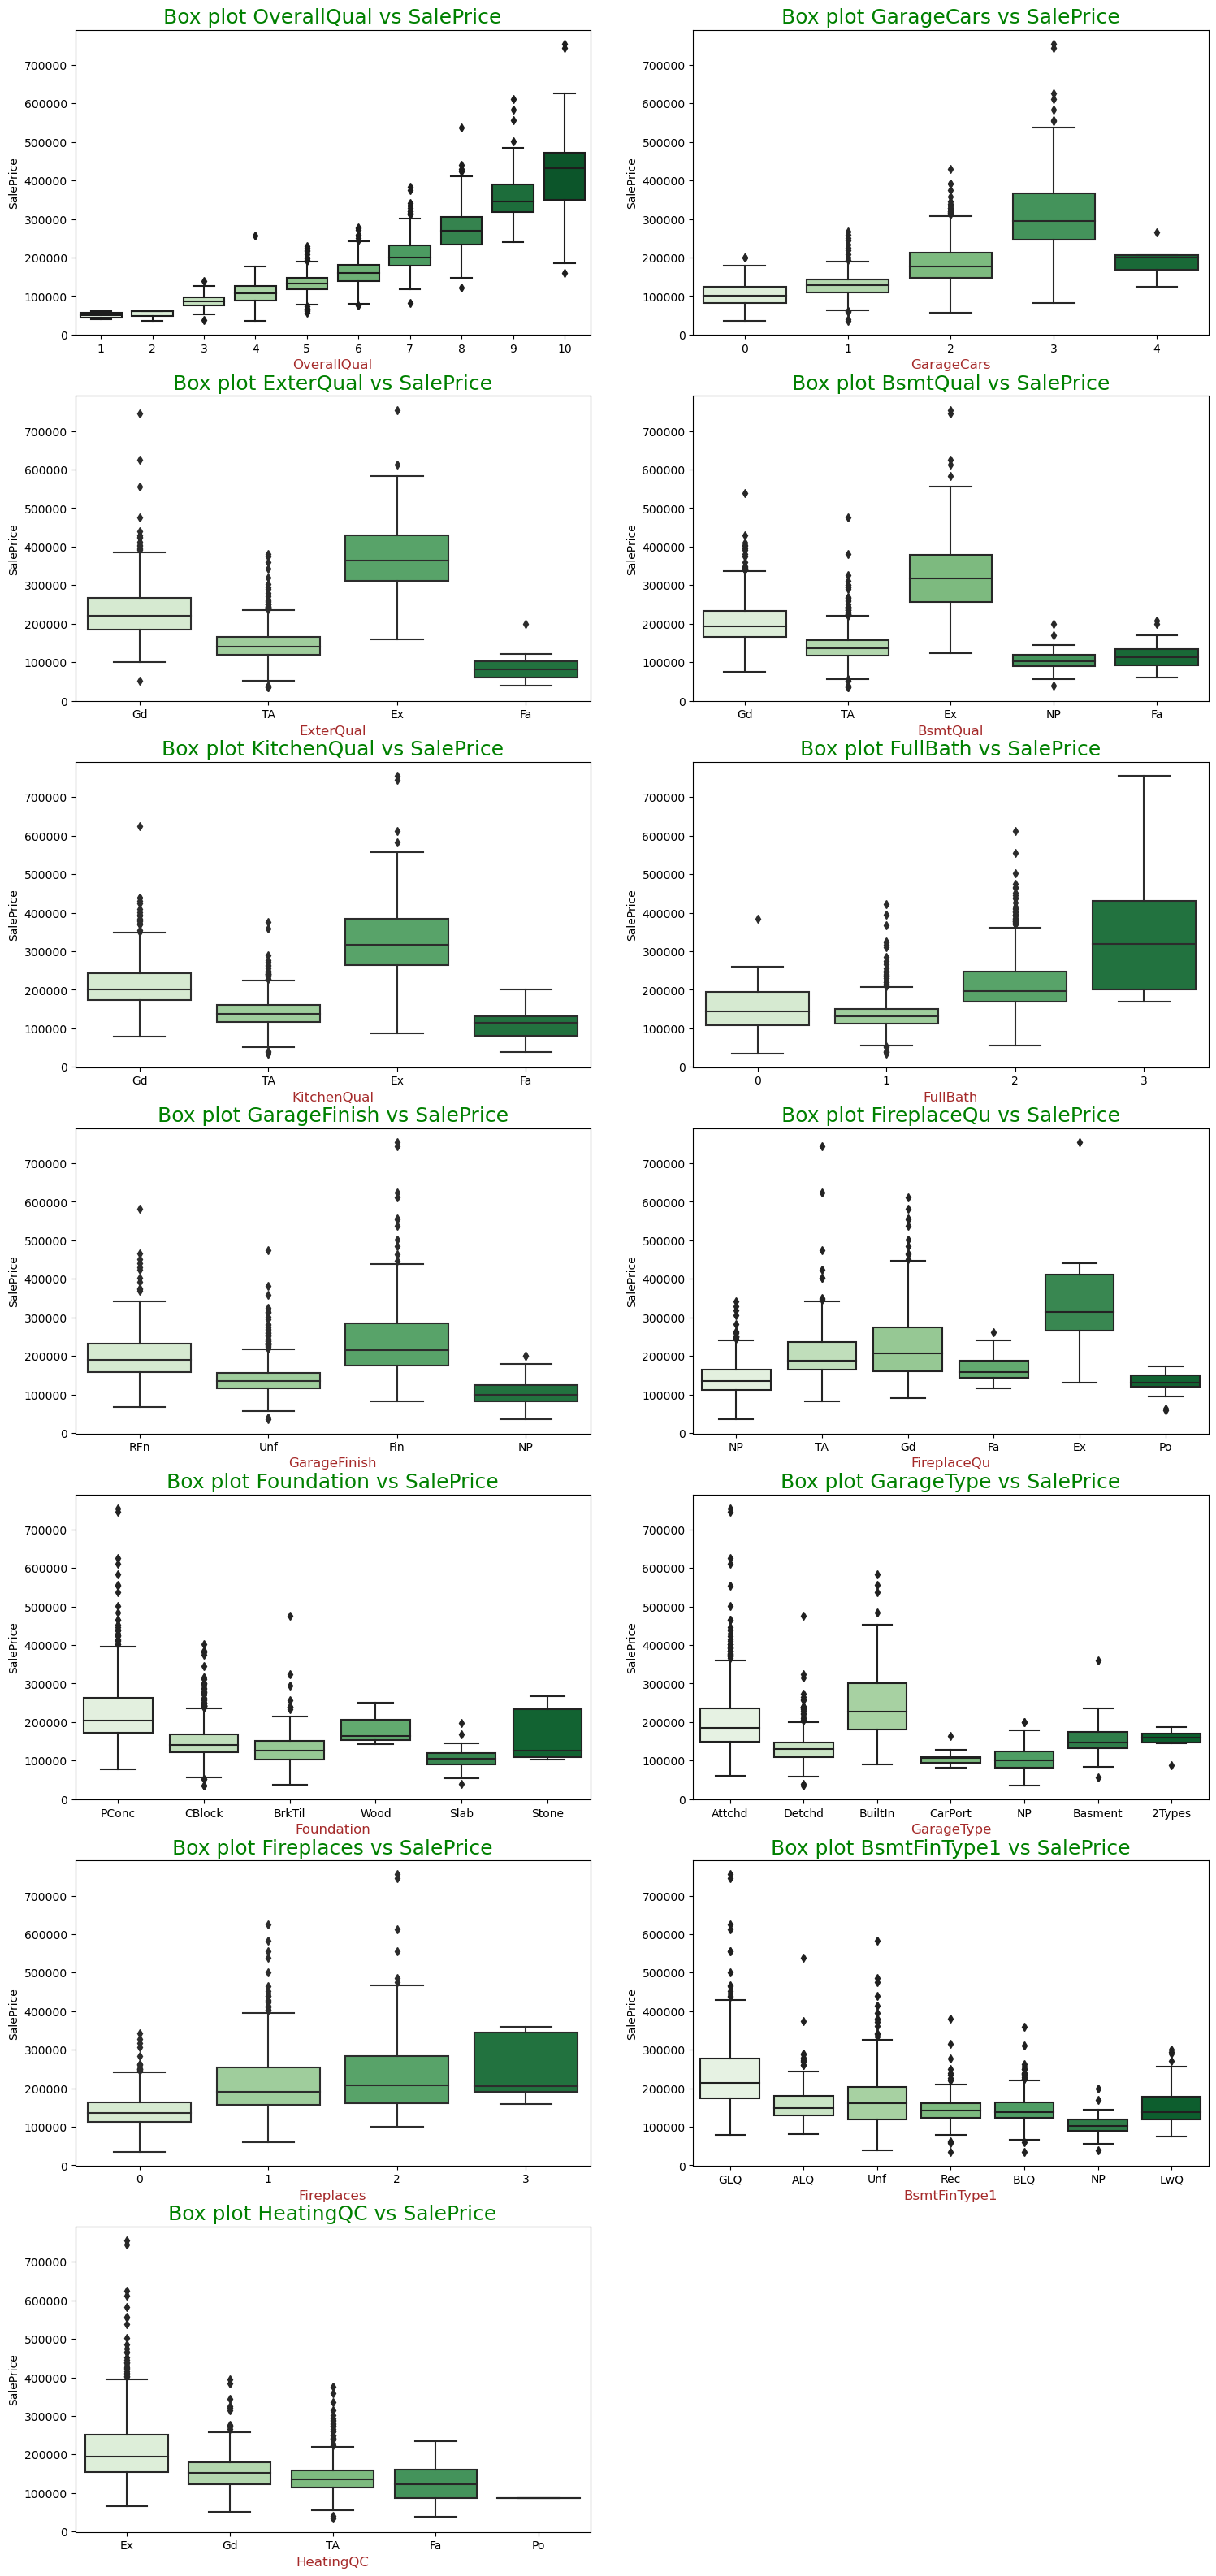

In [55]:
cat_cols= ['OverallQual','GarageCars','ExterQual','BsmtQual','KitchenQual','FullBath','GarageFinish','FireplaceQu','Foundation','GarageType','Fireplaces','BsmtFinType1','HeatingQC']

plt.figure(figsize=[18, 40])

for i, col in enumerate(cat_cols, 1):
    plt.subplot(7,2,i)
    title_text= f'Box plot {col} vs SalePrice'
    x_label= f'{col}'
    fig= sns.boxplot(data= housing, x= col, y= 'SalePrice', palette= 'Greens')
    fig.set_title(title_text, fontdict= { 'fontsize': 18, 'color': 'Green'})
    fig.set_xlabel(x_label, fontdict= {'fontsize': 12, 'color': 'Brown'})
plt.show()

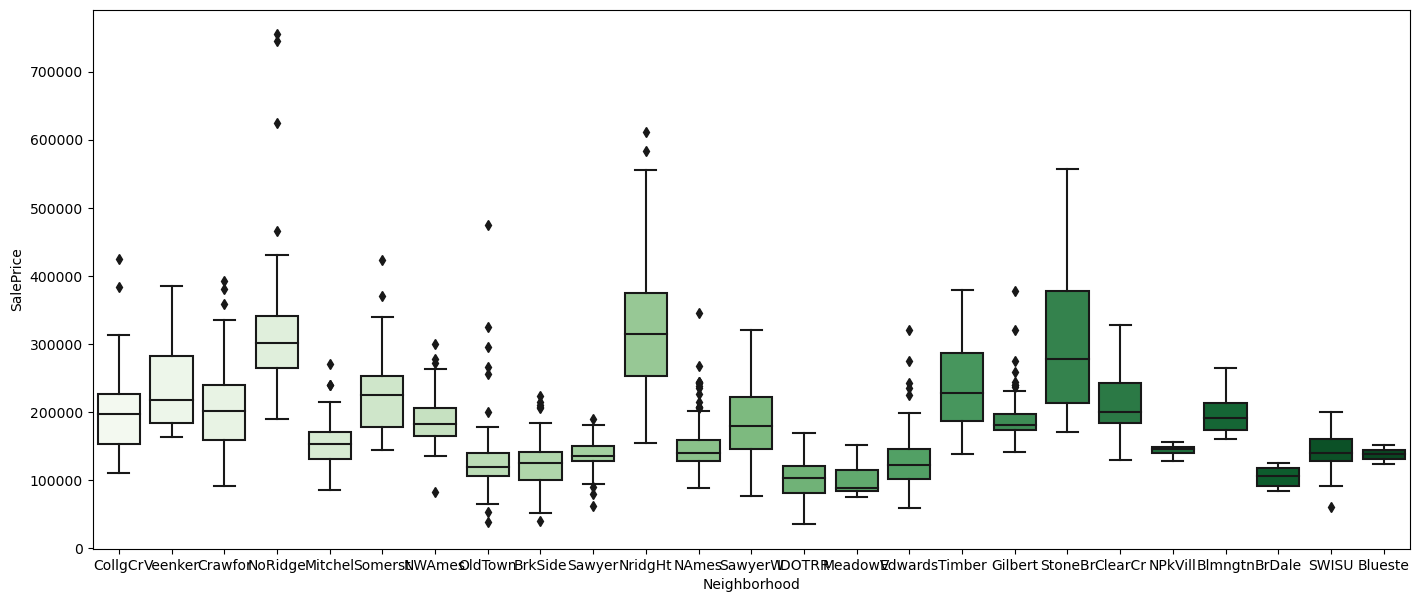

In [60]:
plt.figure(figsize=[17,7])
sns.boxplot(data= housing, x= 'Neighborhood', y= 'SalePrice', palette= 'Greens')
plt.show()

In [68]:
from scipy import stats
%matplotlib inline

In [71]:
types_train = housing.dtypes 
nums = types_train[(types_train == 'int64') | (types_train == float)]
cats = types_train[types_train == object]

In [73]:
pd.DataFrame(types_train).reset_index().set_index(0).reset_index()[0].value_counts()

0
object     44
int64      34
float64     3
Name: count, dtype: int64

In [74]:
#All numerical data in the dataset
num_list = list(nums.index)
print(num_list)

['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [75]:
#All catagorical data in the dataset
cat_list = list(cats.index)
print(cat_list)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


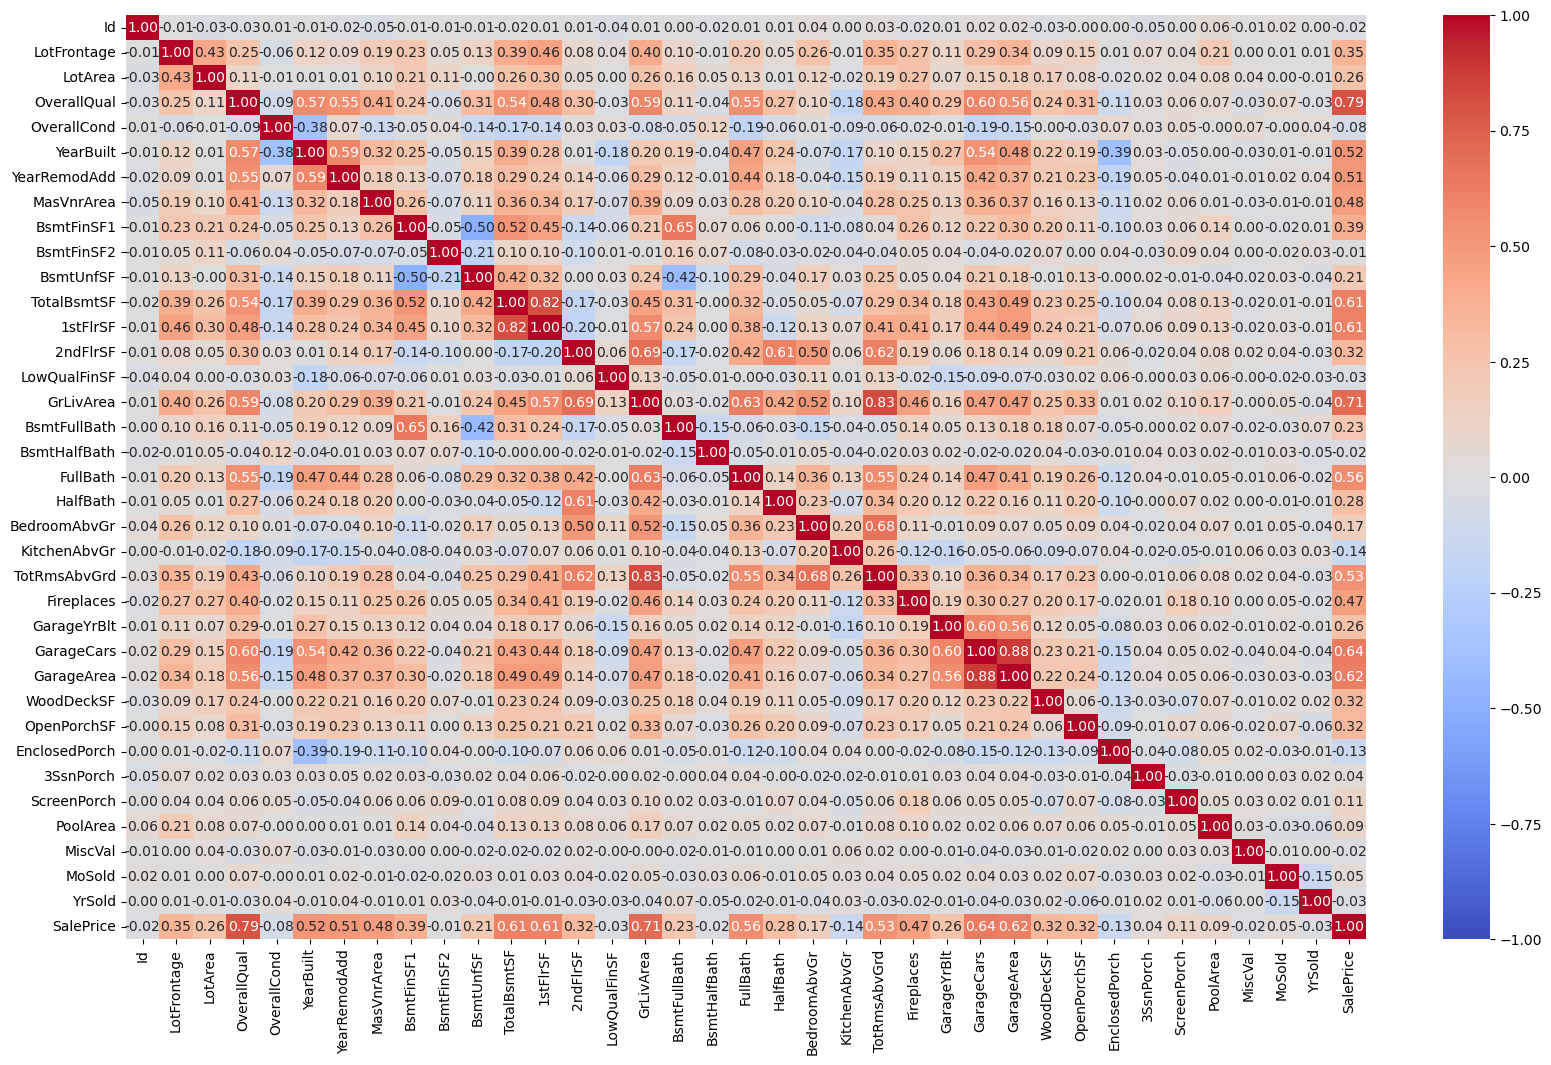

In [80]:
# Creating correlation heatmap
plt.figure(figsize = (20, 12))

sns.heatmap(housing.corr(numeric_only=True), annot= True, cmap= 'coolwarm', fmt= '.2f', vmin= -1, vmax= 1, )

plt.show()

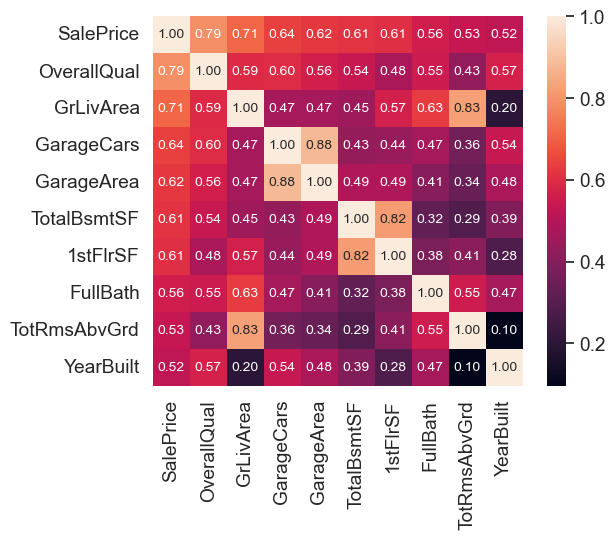

In [81]:
k = 10 
cols = (housing.corr(numeric_only=True)).nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(housing[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [82]:
#Infrences
#SalePrice is right sckewed and other numeic feature: 'GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','TotRmsAbvGrd','YearBuilt','YearRemodAdd','MasVnrArea', 'BsmtFinSF1','LotFrontage','WoodDeckSF','2ndFlrSF','OpenPorchSF','LotArea' have outlier and they all have somewhat linear relation with SalePrice.

#SalePrice is higher for the houses with higher OverallQual rating. Price reduces as quality decreases.

#SalePrice is high for houses having some specific Neighbourhoods : Northridge Heights, Stone Brook, Northridge etc.

#SalePrice is higher for the houses having Excellent Heating quality and median price reduces with Heating quality type and least for the houses having Poor heating quality.

#SalePrice is very high for Good Living Quarters type basement finished area and if the beasement height is more than 100+ inches and least for the houses not having basement.

#Houses having a garage as part of the house (typically has room above garage) and garage interior 'finish' or 'Rough Finished', have higest median SalePrice. Price is lower for the houses having no garage.

#Houses with garage in car capacity of 3 have highest SalePrice.

#Houses having Poured Contrete foundation has higher SalePrice. 

#SalePrice is high for houses with 3 Full bathrooms above grade.

#Corelation for GrLivArea and TotRmsAbvGrd= .83, GarageCars and GarageArea= .88 very high.

In [83]:
#dropping GarageCars and TotRmsAbvGrd

In [84]:
housing.drop(['GarageCars', 'TotRmsAbvGrd'], axis=1, inplace=True)
housing.shape

(1460, 79)

# Data prep

In [85]:
#treating target skewness

housing['SalePrice_log_trans']= np.log(housing['SalePrice'])

In [87]:
housing.drop(['SalePrice','Id'], axis=1, inplace= True)
housing.shape

(1460, 78)

<function matplotlib.pyplot.show(close=None, block=None)>

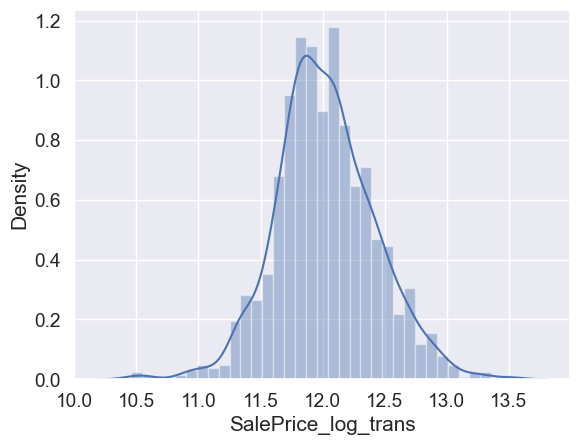

In [89]:
sns.distplot(housing['SalePrice_log_trans'])
plt.show

In [90]:
#train-test split

y= housing['SalePrice_log_trans']
X= housing.drop('SalePrice_log_trans', axis= 1)

X_train, X_test, y_train, y_test= train_test_split(X, y, train_size= .7, random_state= 42)

In [91]:
train_index= X_train.index
test_index= X_test.index

In [92]:
#Imputing rest of the features in test and train dataset using median (for continuous variables) 
#and mode (for categorical variables) calculated on train dataset.

housing['LotFrontage'].fillna(X_train['LotFrontage'].median(), inplace= True)
housing['LotFrontage'].fillna(X_train['LotFrontage'].median(), inplace= True)

housing['MasVnrArea'].fillna(X_train['MasVnrArea'].median(), inplace= True)
housing['MasVnrArea'].fillna(X_train['MasVnrArea'].median(), inplace= True)

housing['MasVnrType'].fillna(X_train['MasVnrType'].mode(), inplace= True)
housing['MasVnrType'].fillna(X_train['MasVnrType'].mode(), inplace= True)

housing['Electrical'].fillna(X_train['Electrical'].mode(), inplace= True)
housing['Electrical'].fillna(X_train['Electrical'].mode(), inplace= True)

In [93]:
#Since the dataframe is changed, the encoding performed previously need to be redone on test train set
housing_cat= housing.select_dtypes(include= 'object')
housing_num= housing.select_dtypes(exclude= 'object')
housing_cat.describe()


,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,15,5,2,3,4,4,2,5,3,25,...,7,4,6,6,3,4,5,5,9,6
top,20,RL,Pave,NP,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Attchd,Unf,TA,TA,Y,NP,NP,NP,WD,Normal
freq,536,1151,1454,1369,925,1311,1459,1052,1382,225,...,870,605,1311,1326,1340,1453,1179,1406,1267,1198


In [94]:
#encoding necessary unique data
housing['Street']= housing.Street.map(lambda x: 1 if x== 'Pave' else 0)
housing['Utilities']= housing.Utilities.map(lambda x: 1 if x== 'AllPub' else 0)
housing['CentralAir']= housing.CentralAir.map(lambda x: 1 if x== 'Y' else 0)

cat_cols= housing_cat.columns.tolist()
done_encoding= ['Street','Utilities', 'CentralAir']
cat_cols= [col for col in cat_cols if col not in done_encoding]
dummies= pd.get_dummies(housing[cat_cols], drop_first=True)


In [95]:
housing.drop(cat_cols, axis=1, inplace= True)
housing= pd.concat([housing, dummies], axis= 1)

In [96]:
#reconstructing train test data before scaling

X_train= housing.iloc[train_index, :].drop('SalePrice_log_trans', axis= 1)
y_train= housing.iloc[train_index, :]['SalePrice_log_trans']
X_test= housing.iloc[test_index, :].drop('SalePrice_log_trans', axis= 1)
y_test= housing.iloc[test_index, :]['SalePrice_log_trans']



In [97]:
#Scaling

num_cols= housing_num.columns.tolist()
num_cols.remove('SalePrice_log_trans')
scaler= RobustScaler(quantile_range=(2, 98))
scaler.fit(X_train[num_cols])
X_train[num_cols]= scaler.transform(X_train[num_cols])
X_test[num_cols]= scaler.transform(X_test[num_cols])

In [98]:
X_train[num_cols].head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1452,-0.360825,-0.255342,-0.2,0.0,0.318533,0.186441,0.126743,0.109760,0.000000,-0.290195,...,0.045214,0.000000,0.003912,0.0,0.0,0.0,0.0,0.0,-0.090909,-0.50
762,0.020619,-0.041372,0.2,0.0,0.357143,0.254237,0.000000,-0.255872,0.000000,0.149603,...,0.143361,0.367391,0.070423,0.0,0.0,0.0,0.0,0.0,0.000000,0.50
932,0.144330,0.089208,0.6,0.0,0.328185,0.203390,0.478454,-0.272651,0.000000,0.854362,...,0.335245,0.000000,0.641628,0.0,0.0,0.0,0.0,0.0,-0.272727,-0.25
435,-0.278351,0.045983,0.2,0.2,0.231660,0.033898,0.000000,-0.003496,0.559168,-0.248137,...,0.072783,0.343478,0.133020,0.0,0.0,0.0,0.0,0.0,-0.181818,0.25
629,0.123711,-0.024995,0.0,0.0,-0.077220,-0.508475,0.410330,0.163591,0.546164,-0.117159,...,0.039700,0.382609,-0.105634,0.0,0.0,0.0,0.0,0.0,0.000000,0.00


# MODEL

RIDGE

In [99]:
#RANDOMLY CHOSEN ALPHAS

range1= [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
range2= list(range(2, 1001))
range1.extend(range2)
params_grid= {'alpha': range1}

In [100]:
#Finding lambda 

In [101]:
ridge= Ridge(random_state= 42)
gcv_ridge= GridSearchCV(estimator= ridge, 
                        param_grid= params_grid,
                        cv= 3,
                        scoring= 'neg_mean_absolute_error',
                        return_train_score= True,
                        n_jobs= -1,
                        verbose= 1)      
gcv_ridge.fit(X_train, y_train)

Fitting 3 folds for each of 1013 candidates, totalling 3039 fits


GridSearchCV(cv=3, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2, 3, 4,
                                   5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
                                   17, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [102]:
gcv_ridge.best_estimator_

Ridge(alpha=7, random_state=42)

In [103]:
gcv_ridge.best_score_

-0.09558866145873983

In [104]:
#fitting model for alpha=7

In [105]:
ridge_model= gcv_ridge.best_estimator_
ridge_model.fit(X_train, y_train)

Ridge(alpha=7, random_state=42)

In [106]:
#checking training set

In [107]:
y_train_pred= ridge_model.predict(X_train)
print( 'r2 score on training dataset:', r2_score(y_train, y_train_pred))
print( 'MSE on training dataset:', mean_squared_error(y_train, y_train_pred))
print( 'RMSE on training dataset:', (mean_squared_error(y_train, y_train_pred)**.5))
print( 'MAE on training dataset:', mean_absolute_error(y_train, y_train_pred))

r2 score on training dataset: 0.9214876032244333
MSE on training dataset: 0.012181673763453615
RMSE on training dataset: 0.11037062001934037
MAE on training dataset: 0.07498493696748075


In [108]:
ridge_model.coef_

array([-2.21571952e-02,  3.36619765e-02,  8.22205280e-03,  2.00516877e-02,
        2.26358938e-01,  1.26716284e-01,  8.14974025e-02,  7.10884860e-02,
       -1.56225085e-03, -1.50774099e-02,  2.37986510e-02,  1.35296441e-02,
        7.81836270e-03,  7.25666775e-02,  1.15750770e-01,  1.20390118e-01,
        2.06261011e-04,  1.66873476e-01,  4.25043650e-02,  1.54417791e-03,
        9.50093935e-02,  4.67502563e-02,  7.71786858e-02, -3.55224354e-02,
        3.25034803e-02,  2.08531763e-02,  1.19219998e-01,  5.18588833e-02,
       -6.55262397e-03,  2.51425560e-02,  2.49998794e-04,  5.44856466e-02,
       -8.52866635e-05, -2.52037272e-03,  1.41086709e-02, -1.10861890e-02,
       -9.15116001e-02,  9.05724701e-03, -5.36319405e-03,  3.33443390e-03,
       -9.47798339e-03,  4.55193607e-02,  2.82349798e-02, -9.82283123e-03,
        1.23709722e-02, -5.76632408e-03, -2.80642628e-02, -8.45784696e-02,
       -2.22521954e-02, -1.24574432e-02,  4.19540993e-02,  1.65235881e-02,
        4.29880373e-02, -

In [113]:
ridge_model.intercept_

11.640152893914877

In [114]:
# Top 25 features with double the value of optimal alpha in Ridge
ridge_coef= pd.Series(ridge_model.coef_, index= X_train.columns)
top_25_ridge=  ridge_coef[abs(ridge_coef).nlargest(25).index]
top_25_ridge

OverallQual             0.226359
GrLivArea               0.166873
OverallCond             0.126716
2ndFlrSF                0.120390
GarageArea              0.119220
Neighborhood_StoneBr    0.119013
1stFlrSF                0.115751
Condition2_PosN        -0.100017
PoolQC_Gd              -0.098480
FullBath                0.095009
Exterior1st_BrkFace     0.093822
MSSubClass_30          -0.091512
Neighborhood_MeadowV   -0.089328
BsmtQual_TA            -0.084876
MSSubClass_160         -0.084578
LandContour_HLS         0.083781
Neighborhood_NridgHt    0.083119
YearBuilt               0.081497
SaleCondition_Alloca    0.081422
Neighborhood_Crawfor    0.081399
Functional_Maj2        -0.078079
BedroomAbvGr            0.077179
Neighborhood_Edwards   -0.073767
BldgType_Twnhs         -0.073111
CentralAir              0.072567
dtype: float64

LASSO

In [110]:
params_grid= {'alpha': range1}
lasso= Lasso(random_state= 42)
lasso_gcv= GridSearchCV(estimator= lasso, 
                        param_grid= params_grid,
                        cv= 3,
                        scoring= 'neg_mean_absolute_error',
                        return_train_score= True,
                        n_jobs= -1,
                        verbose= 1)

lasso_gcv.fit(X_train, y_train)     

Fitting 3 folds for each of 1013 candidates, totalling 3039 fits


GridSearchCV(cv=3, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2, 3, 4,
                                   5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
                                   17, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [111]:
lasso_gcv.best_estimator_

Lasso(alpha=0.0001, random_state=42)

In [112]:
lasso_gcv.best_score_

-0.09383380382532892

In [115]:
#OPTIMAL ALPHA IS 0.0001

range3= [0.00005, 0.00006, 0.00007, 0.00008, 0.00009, 0.0001, .0002, .0003, .0004, .0005, .0006, .0007, .0008, .0009, .001]
params_grid= {'alpha': range3}
lasso_gcv= GridSearchCV(estimator= lasso, 
                        param_grid= params_grid,
                        cv= 3,
                        scoring= 'neg_mean_absolute_error',
                        return_train_score= True,
                        n_jobs= -1,
                        verbose= 1)

lasso_gcv.fit(X_train, y_train)   


Fitting 3 folds for each of 15 candidates, totalling 45 fits


GridSearchCV(cv=3, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': [5e-05, 6e-05, 7e-05, 8e-05, 9e-05, 0.0001,
                                   0.0002, 0.0003, 0.0004, 0.0005, 0.0006,
                                   0.0007, 0.0008, 0.0009, 0.001]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [116]:
lasso_gcv.best_estimator_

Lasso(alpha=0.0004, random_state=42)

In [117]:
#OPTIMUM ALPHA IS 0.0004

In [118]:
lasso_model= lasso_gcv.best_estimator_
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.0004, random_state=42)

In [119]:
#EVALUATION ON TRAINING SET

In [120]:
print( 'r2 score on training dataset:', r2_score(y_train, y_train_pred))
print( 'MSE on training dataset:', mean_squared_error(y_train, y_train_pred))
print( 'RMSE on training dataset:', (mean_squared_error(y_train, y_train_pred)**.5))
print( 'MAE on training dataset:', mean_absolute_error(y_train, y_train_pred))

r2 score on training dataset: 0.9214876032244333
MSE on training dataset: 0.012181673763453615
RMSE on training dataset: 0.11037062001934037
MAE on training dataset: 0.07498493696748075


In [121]:
#EVALUATION ON TEST SET

In [122]:
y_test_pred= lasso_model.predict(X_test)
print( 'r2 score on testing dataset:', r2_score(y_test, y_test_pred))
print( 'MSE on testing dataset:', mean_squared_error(y_test, y_test_pred))
print( 'RMSE on testing dataset:', (mean_squared_error(y_test, y_test_pred)**.5))
print( 'MAE on testing dataset:', mean_absolute_error(y_test, y_test_pred))

r2 score on testing dataset: 0.8901836024515031
MSE on testing dataset: 0.01858822282905305
RMSE on testing dataset: 0.13633863292938303
MAE on testing dataset: 0.09141274769732087


In [123]:
#FEATURES USED IN LASSO and Ridge

In [130]:
lasso_coef= pd.Series(lasso_model.coef_, index= X_train.columns)
selected_features= len(lasso_coef[lasso_coef != 0])
print('Features selected by Lasso:', selected_features)
print('Features present in Ridge:', X_train.shape[1])

Features selected by Lasso: 134
Features present in Ridge: 270


In [125]:
#FEATURES USED IN RIDGE

In [126]:
print(X_train.shape[1])

270


In [127]:
#INTERCEPT IN LASSO

In [128]:
lasso_model.intercept_

11.772669269131738

In [129]:
# Top 25 features with coefficients in Lasso model
top25_features_lasso=  lasso_coef[abs(lasso_coef[lasso_coef != 0]).nlargest(25).index]
top25_features_lasso

PoolQC_Gd              -0.558137
GrLivArea               0.407442
Condition2_PosN        -0.396786
OverallQual             0.286999
SaleCondition_Alloca    0.174629
OverallCond             0.153345
Neighborhood_StoneBr    0.141663
GarageArea              0.138480
YearBuilt               0.136129
Neighborhood_Crawfor    0.104047
Neighborhood_NridgHt    0.102349
Exterior1st_BrkFace     0.102178
Functional_Maj2        -0.097007
MSSubClass_30          -0.093324
BldgType_Twnhs         -0.092994
BsmtQual_NP            -0.092652
Neighborhood_MeadowV   -0.086169
Heating_Grav           -0.082955
LandContour_HLS         0.080199
BldgType_TwnhsE        -0.077259
FullBath                0.069851
Neighborhood_NoRidge    0.066864
CentralAir              0.066426
YearRemodAdd            0.063448
BsmtCond_TA             0.062635
dtype: float64

In [ ]:
#Optimal alpha (lambda) value for Ridge Regression model is: 7
#Optimal alpha (lambda) value for Lasso Regression model is: 0.0004
#Ridge and Lasso have same accuracy so no overfitting
#Ridge use 270 and Lasso 134 features

In [131]:
#Doubling the alphas

In [133]:
ridge2= Ridge(alpha= 14, random_state= 42)
ridge2.fit(X_train, y_train)

Ridge(alpha=14, random_state=42)

In [134]:
ridge_coef2= pd.Series(ridge2.coef_, index= X_train.columns)
top10_ridge2=  ridge_coef2[abs(ridge_coef2).nlargest(10).index]
top10_ridge2

OverallQual             0.209694
GrLivArea               0.148881
OverallCond             0.114115
GarageArea              0.109140
1stFlrSF                0.105502
2ndFlrSF                0.104958
Neighborhood_StoneBr    0.092548
FullBath                0.091985
MSSubClass_30          -0.083861
Exterior1st_BrkFace     0.080400
dtype: float64

In [135]:
lasso2= Lasso(alpha= .0008, random_state=42)
lasso2.fit(X_train, y_train)

Lasso(alpha=0.0008, random_state=42)

In [136]:
lasso_coef2= pd.Series(lasso2.coef_, index= X_train.columns)
top10_lasso2=  lasso_coef2[abs(lasso_coef2[lasso_coef2 != 0]).nlargest(10).index]
top10_lasso2

GrLivArea               0.381661
OverallQual             0.330865
Condition2_PosN        -0.161441
OverallCond             0.142014
GarageArea              0.141218
Neighborhood_StoneBr    0.115932
YearBuilt               0.099202
Exterior1st_BrkFace     0.097003
Neighborhood_NridgHt    0.093044
MSSubClass_30          -0.090542
dtype: float64

In [137]:
#top 5 features in lasso model

In [138]:
top25_features_lasso.nlargest()

GrLivArea               0.407442
OverallQual             0.286999
SaleCondition_Alloca    0.174629
OverallCond             0.153345
Neighborhood_StoneBr    0.141663
dtype: float64

In [139]:
#checking neighbourhood dummies and dropping them
cols_to_drop= X_train.columns[X_train.columns.str.startswith('Neighborhood')].tolist()
cols_to_drop.extend(['GrLivArea','OverallQual','OverallCond','GarageArea'])
cols_to_drop

['Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'GrLivArea',
 'OverallQual',
 'OverallCond',
 'GarageArea']

In [140]:
X_train= X_train.drop(cols_to_drop, axis= 1)
X_test= X_test.drop(cols_to_drop, axis= 1)
X_train.shape, X_test.shape

((1021, 242), (439, 242))

In [141]:
#using lasso with these features

In [142]:
lasso3= Lasso(alpha= .0004, random_state= 42)
lasso3.fit(X_train, y_train)

Lasso(alpha=0.0004, random_state=42)

In [143]:
lasso_coef3= pd.Series(lasso3.coef_, index= X_train.columns)
top5_lasso3=  lasso_coef3[abs(lasso_coef3[lasso_coef3 != 0]).nlargest().index]
top5_lasso3

PoolQC_Gd              -0.703161
1stFlrSF                0.425399
Condition2_PosN        -0.420816
2ndFlrSF                0.370967
SaleCondition_Alloca    0.174881
dtype: float64